# Date A Scientist

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

## Loading the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

profiles = pd.read_csv('./Data/profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


We then need to examine the name of the columns and the data types.

In [2]:
profiles.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

It also noticed that the star sign column isn't clean. To see all the different ones we will look at unique categories.

In [3]:
print(profiles.sign.unique())

['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'
 'sagi

Noticing that the star sign is only the first word we can split the string and only select the first word.

In [4]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
profiles.signsCleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

## Data exporation
We will plot the what we view to be the useful information to notice trends or problems.


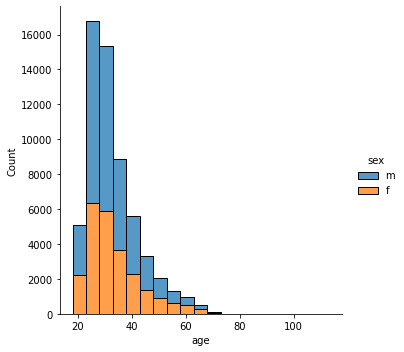

In [5]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

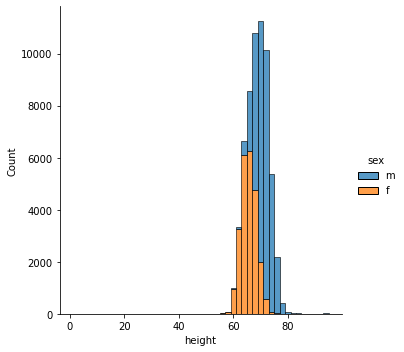

In [6]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

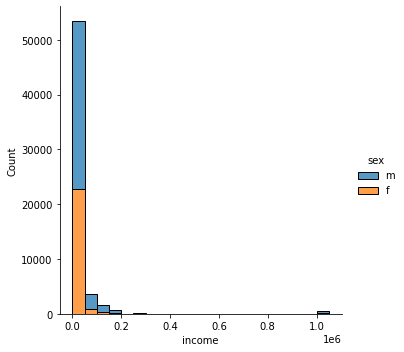

In [7]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

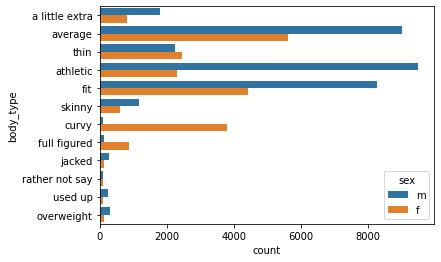

In [8]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

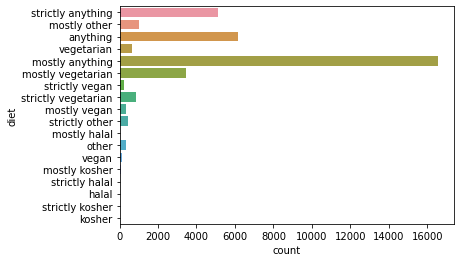

In [9]:
sns.countplot(data=profiles, y="diet");

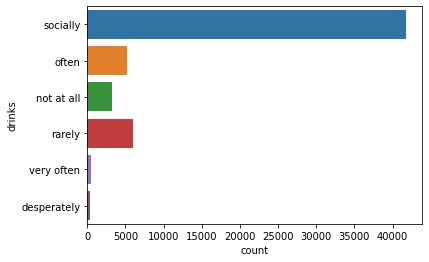

In [10]:
sns.countplot(data=profiles, y="drinks");

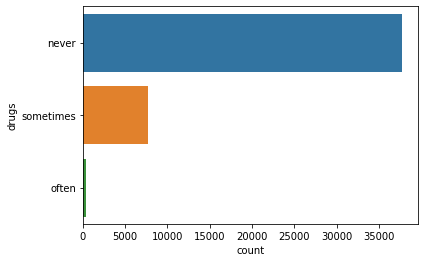

In [11]:
sns.countplot(data=profiles, y="drugs");

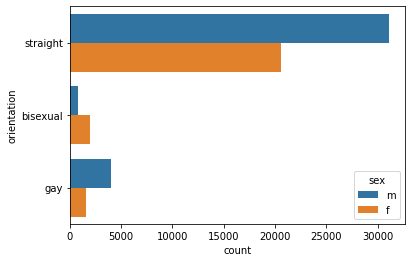

In [12]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

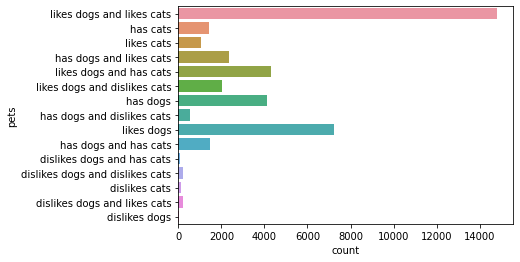

In [13]:
sns.countplot(data=profiles, y="pets");

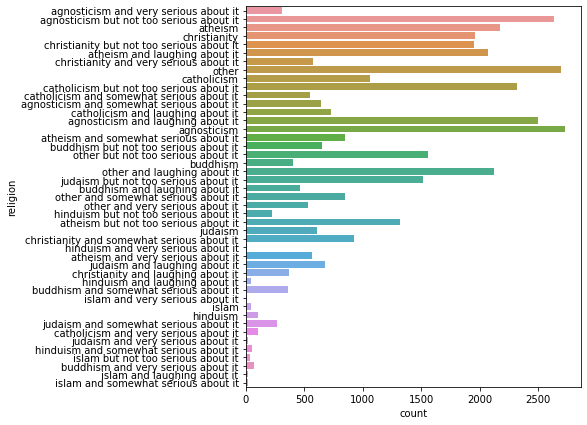

In [14]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

Religion has the same problem as sign, thus we will solve it the same way.

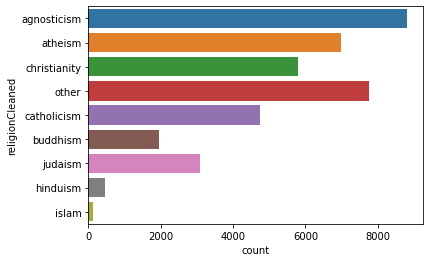

In [15]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

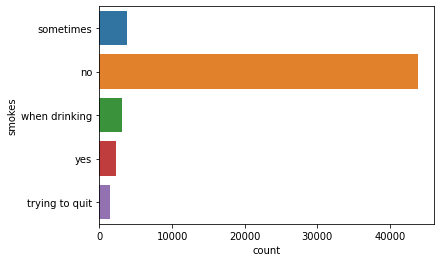

In [16]:
sns.countplot(data=profiles, y="smokes");

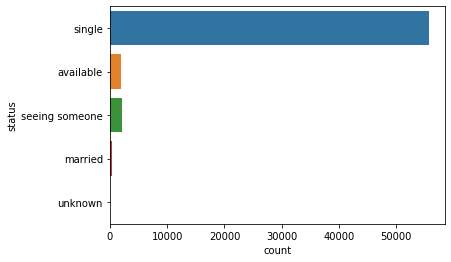

In [17]:
sns.countplot(data=profiles, y="status");

## Prediction

profiles.isnull().sum()

As there is a high number of NA values they will need to be dealt with before modeling. As there is alot of NA values and there is no information on what they could be we will just drop them. We will also only choose certian coloums as others wont achive the aim. Such as age wouldnt help to predict asto sign.

In [19]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

For machine learning algorims we cant use catagorical varibles. Thus we need to set dummies for the varibles of interest.

In [20]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [21]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Next we need to split the data into X and Y and then for train and test and then convert them to a numpy array

In [22]:
col_length = len(df.columns)
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]


from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state = 0)


Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Model Buidling and selection
As we have a multiple class problem there are 3 main models, these are Logistic Regression, Decision Trees, and KNN. There are also a number metrics that can be used to assess the quality of the modle. 

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logisitic Regression

In [25]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

C:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    aquarius       0.12      0.08      0.09      1031
       aries       0.11      0.08      0.10      1043
      cancer       0.13      0.22      0.16      1190
   capricorn       0.12      0.04      0.06       952
      gemini       0.12      0.13      0.12      1200
         leo       0.12      0.20      0.15      1208
       libra       0.12      0.09      0.11      1090
      pisces       0.11      0.07      0.09      1059
 sagittarius       0.13      0.10      0.12      1051
     scorpio       0.13      0.05      0.07      1072
      taurus       0.13      0.12      0.12      1102
       virgo       0.12      0.22      0.16      1164

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



This shows that the modle is accurate only 12% of the time, very poor as random is 8%.

### K Nearest Neighbor

In [26]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.66      0.37      1031
       aries       0.27      0.53      0.36      1043
      cancer       0.30      0.43      0.35      1190
   capricorn       0.31      0.33      0.32       952
      gemini       0.35      0.30      0.32      1200
         leo       0.40      0.28      0.33      1208
       libra       0.37      0.27      0.31      1090
      pisces       0.41      0.24      0.31      1059
 sagittarius       0.41      0.21      0.28      1051
     scorpio       0.41      0.23      0.30      1072
      taurus       0.41      0.23      0.29      1102
       virgo       0.41      0.26      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



33% of the time this model gets it correct which is a good sign, we could also try and change nearest neigbour to improve this further.

### Decision Trees


In [27]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



This is the best model, thus we will plot of confusion matrix of the results. This will allow us to compare true values with predicted. We will also look at the depth of the tree

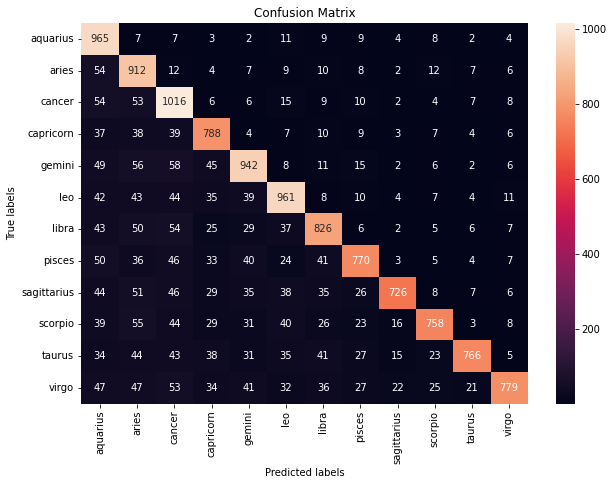

In [28]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [29]:
cart_model.get_depth()

58

This value is far to big, thus its being overfitted. We will do a 5 fold cross validation.

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08469427 0.09418914 0.10106383 0.08168693 0.07636778]
Baseline: 8.76% (0.89%)


This shows that there is very poor accurecy, thus we will limit the depth and try again.

In [31]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 
print(classification_report(Y_train, cart_predictions20))
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')
print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

              precision    recall  f1-score   support

    aquarius       0.45      0.39      0.42      1031
       aries       0.57      0.38      0.46      1043
      cancer       0.42      0.42      0.42      1190
   capricorn       0.55      0.37      0.44       952
      gemini       0.27      0.49      0.35      1200
         leo       0.31      0.50      0.38      1208
       libra       0.38      0.32      0.35      1090
      pisces       0.40      0.34      0.37      1059
 sagittarius       0.48      0.35      0.41      1051
     scorpio       0.34      0.35      0.34      1072
      taurus       0.41      0.34      0.37      1102
       virgo       0.37      0.33      0.35      1164

    accuracy                           0.38     13162
   macro avg       0.41      0.38      0.39     13162
weighted avg       0.41      0.38      0.39     13162

[0.09380934 0.0896316  0.0881459  0.0881459  0.08548632]
Baseline: 8.90% (0.89%)


### Final Model
It apears the kNN model is the best. However using the validation set we only get 8%

              precision    recall  f1-score   support

    aquarius       0.07      0.21      0.11       231
       aries       0.08      0.14      0.10       285
      cancer       0.09      0.15      0.11       267
   capricorn       0.06      0.07      0.06       245
      gemini       0.09      0.07      0.08       296
         leo       0.10      0.07      0.08       308
       libra       0.06      0.05      0.05       264
      pisces       0.06      0.03      0.04       275
 sagittarius       0.10      0.05      0.07       261
     scorpio       0.08      0.04      0.06       284
      taurus       0.05      0.03      0.04       288
       virgo       0.08      0.05      0.06       287

    accuracy                           0.08      3291
   macro avg       0.08      0.08      0.07      3291
weighted avg       0.08      0.08      0.07      3291



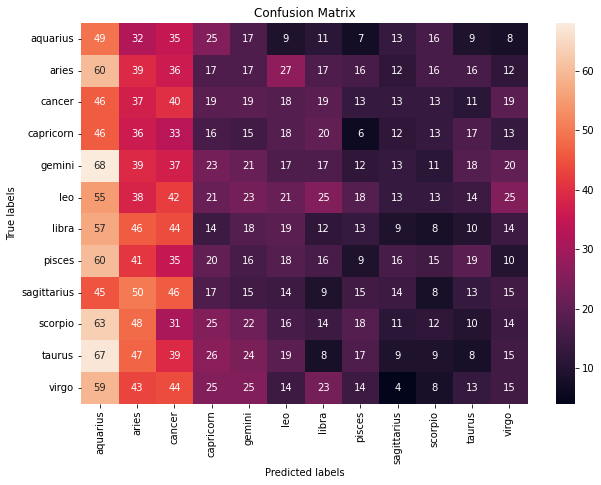

In [32]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);


To improve this further you would need more data, then you could find the optimal value for K